In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from prophet import Prophet

In [3]:
df = pd.read_csv("../datasets/BABA.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,216.854889,15873500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,214.121628,8604500
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,213.766403,11885500
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,214.743286,9388000
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,215.108368,11959100


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,150.177948,152.207784,147.879644,150.054242,148.144197,2.110515e+07
std,71.933817,72.514735,71.024513,71.831161,70.792959,1.359273e+07
min,63.200001,64.099998,58.009998,63.150002,62.312359,6.231400e+06
25%,86.970001,88.379997,85.650002,86.889999,85.737457,1.355850e+07
50%,116.750000,119.709999,114.300003,117.239998,115.684883,1.788920e+07
75%,216.350006,218.229996,213.500000,216.639999,213.766403,2.365050e+07
max,313.500000,319.320007,308.910004,317.140015,312.933350,1.598343e+08


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

<Axes: >

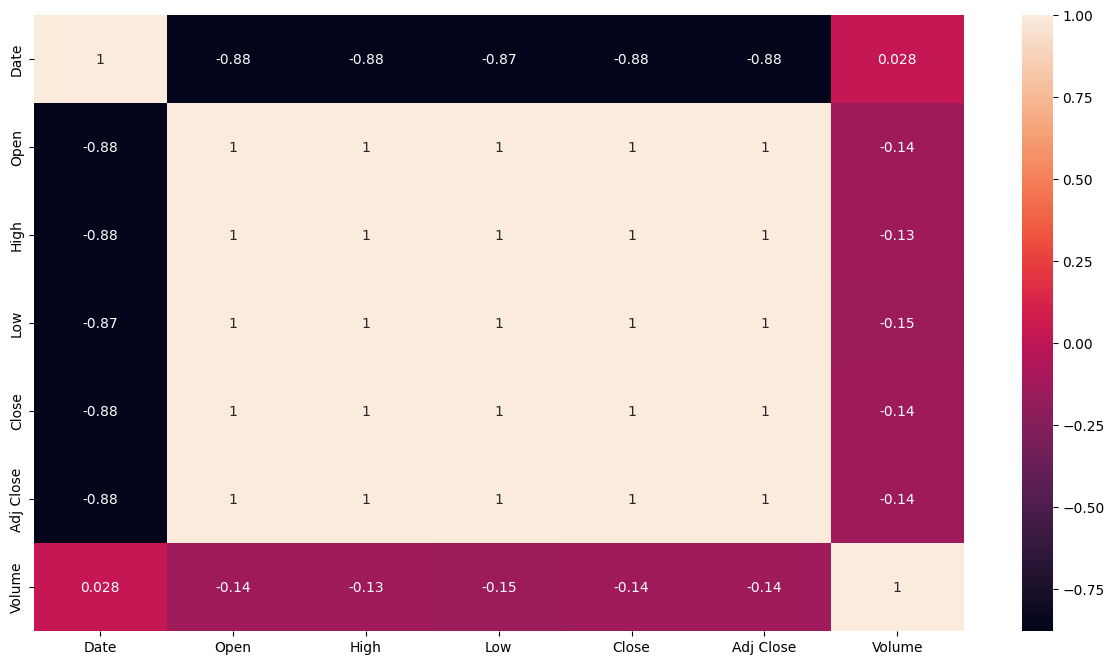

In [9]:
plt.figure(figsize=(15, 8))
sb.heatmap(df.corr(), annot=True, fmt='.2g')

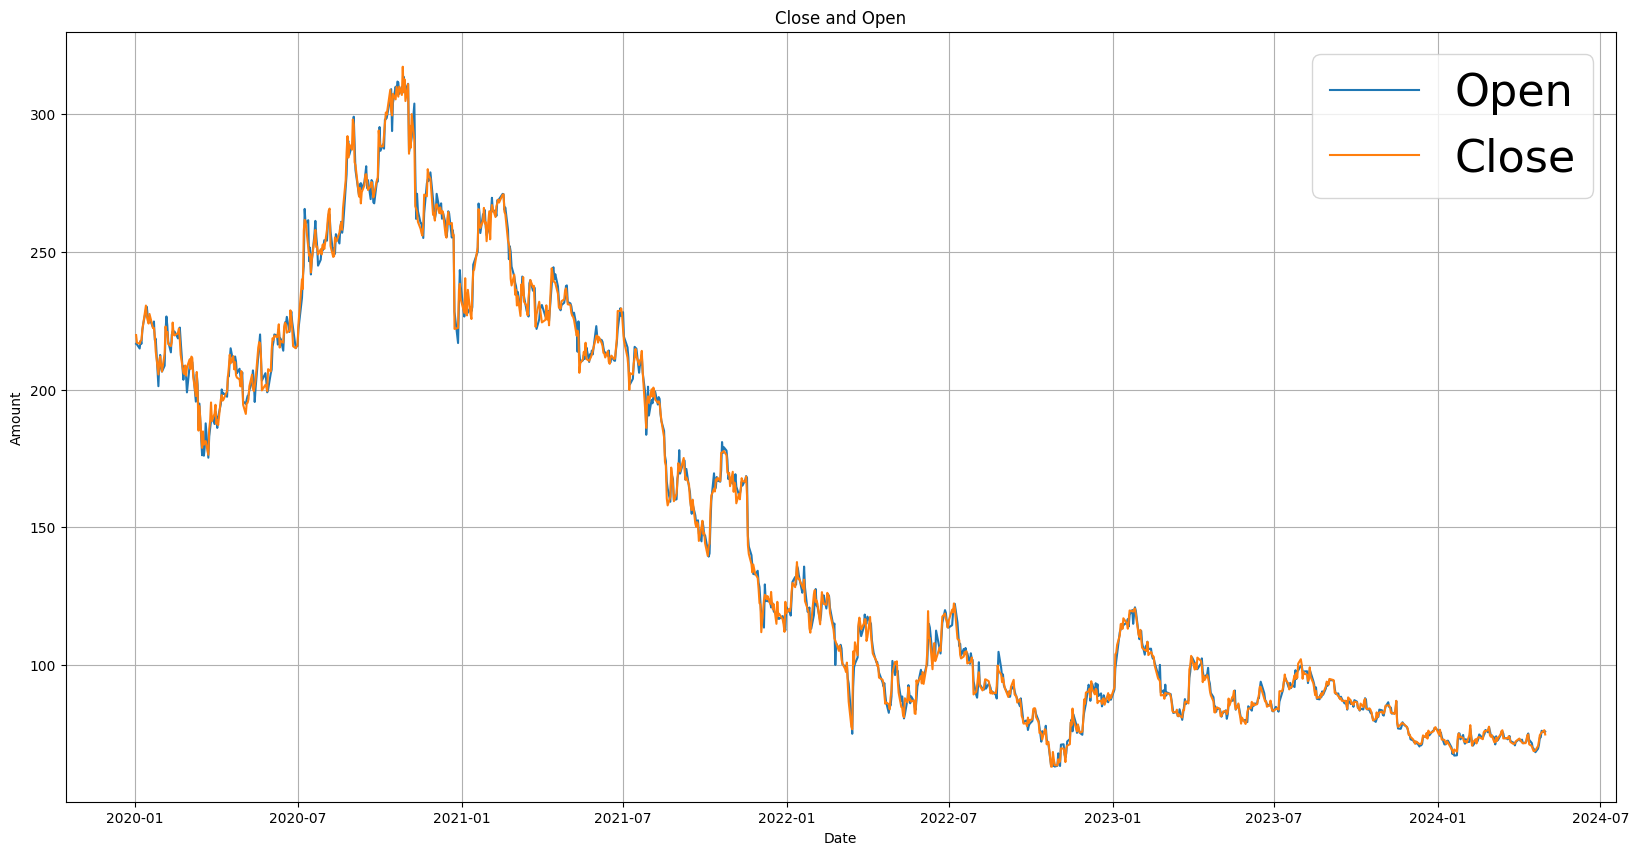

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"], label="Open")
plt.plot(df["Date"], df["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Close and Open")
plt.legend(fontsize='32')
plt.grid(True)

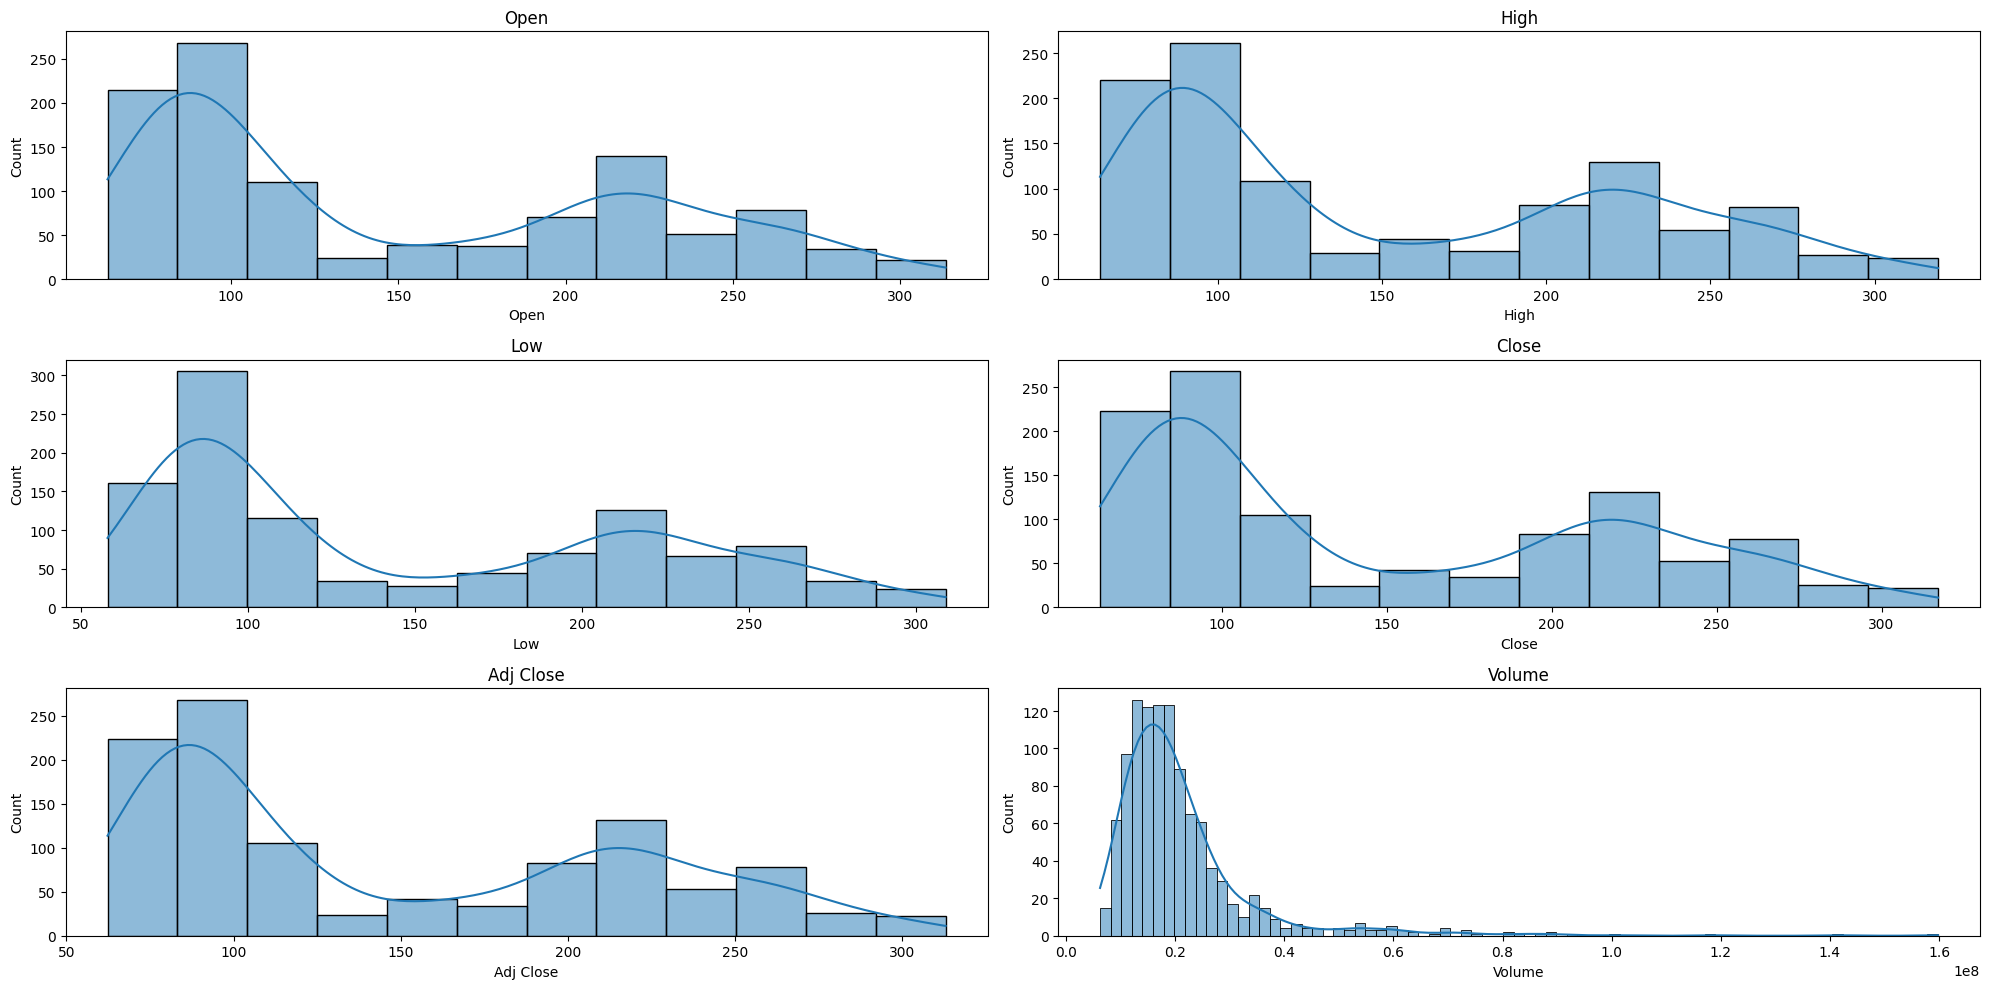

In [11]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(3, 2, i+1)
    sb.histplot(df[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [12]:
data = df[["Date", "Close"]]
data.columns = ["ds", "y"]

In [17]:
model = Prophet()
model.fit(data)

18:09:38 - cmdstanpy - INFO - Chain [1] start processing
18:09:38 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,212.925269,194.248715,217.769896,212.925269,212.925269,-7.777629,-7.777629,-7.777629,-1.218471,-1.218471,-1.218471,-6.559158,-6.559158,-6.559158,0.0,0.0,0.0,205.147640
1,2020-01-03,212.842847,193.160876,218.089072,212.842847,212.842847,-7.106413,-7.106413,-7.106413,-1.206905,-1.206905,-1.206905,-5.899507,-5.899507,-5.899507,0.0,0.0,0.0,205.736435
2,2020-01-06,212.595583,194.224434,219.083541,212.595583,212.595583,-5.725449,-5.725449,-5.725449,-1.966278,-1.966278,-1.966278,-3.759170,-3.759170,-3.759170,0.0,0.0,0.0,206.870134
3,2020-01-07,212.513162,196.880118,221.143910,212.513162,212.513162,-3.921346,-3.921346,-3.921346,-0.903162,-0.903162,-0.903162,-3.018184,-3.018184,-3.018184,0.0,0.0,0.0,208.591816
4,2020-01-08,212.430740,197.114648,221.799567,212.430740,212.430740,-2.807908,-2.807908,-2.807908,-0.531344,-0.531344,-0.531344,-2.276565,-2.276565,-2.276565,0.0,0.0,0.0,209.622832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2025-04-26,52.311122,-24.459775,128.603960,-23.482855,128.738062,-0.365031,-0.365031,-0.365031,2.913080,2.913080,2.913080,-3.278112,-3.278112,-3.278112,0.0,0.0,0.0,51.946091
1450,2025-04-27,52.254725,-25.486950,132.312422,-23.845335,129.113224,-0.678392,-0.678392,-0.678392,2.913080,2.913080,2.913080,-3.591472,-3.591472,-3.591472,0.0,0.0,0.0,51.576333
1451,2025-04-28,52.198327,-29.980867,126.834809,-24.266799,129.488386,-5.870846,-5.870846,-5.870846,-1.966278,-1.966278,-1.966278,-3.904567,-3.904567,-3.904567,0.0,0.0,0.0,46.327482
1452,2025-04-29,52.141930,-32.659375,126.730358,-24.688262,129.820154,-5.120405,-5.120405,-5.120405,-0.903162,-0.903162,-0.903162,-4.217243,-4.217243,-4.217243,0.0,0.0,0.0,47.021525


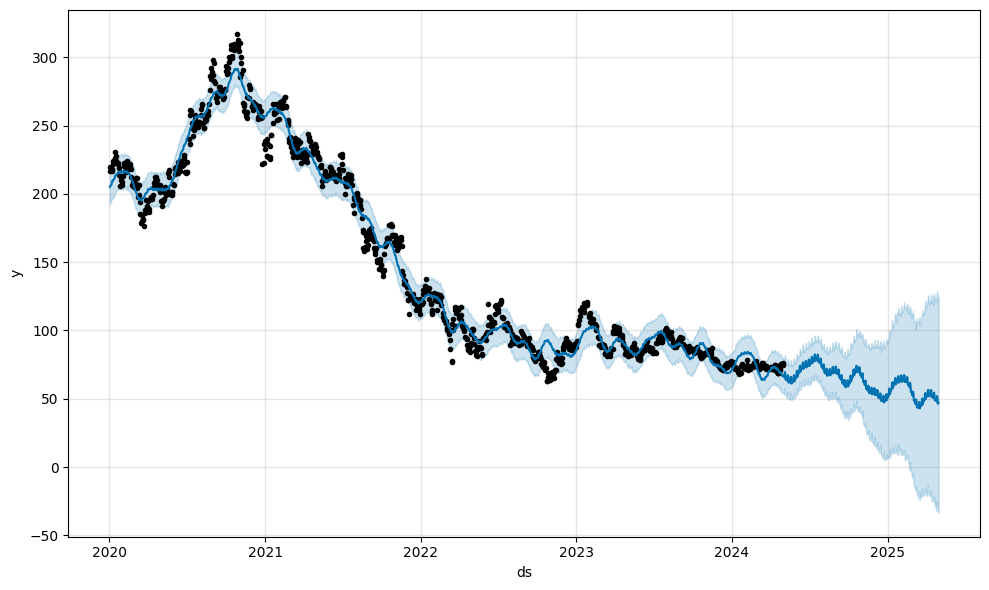

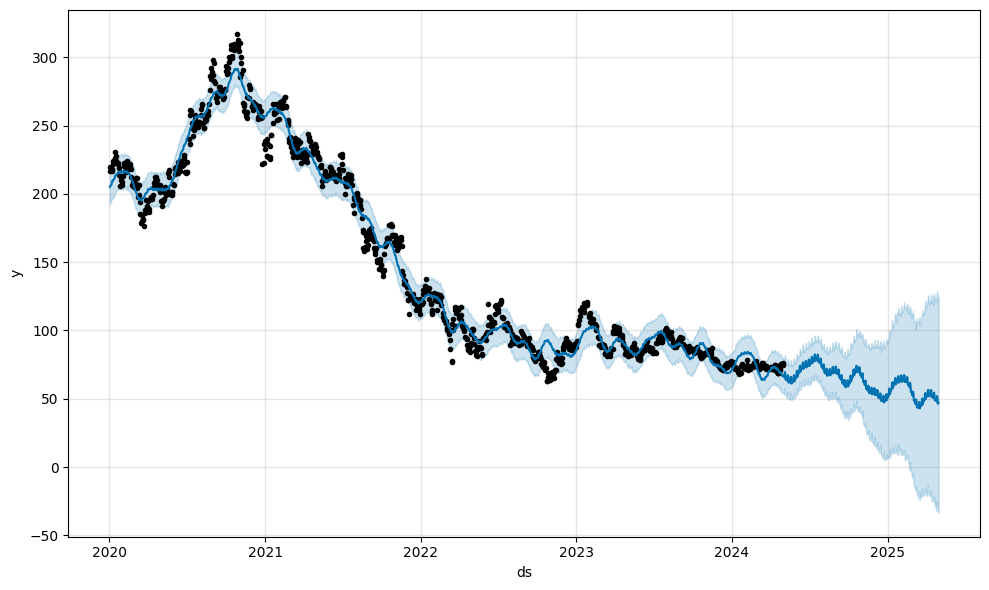

In [16]:
model.plot(forecast)

C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

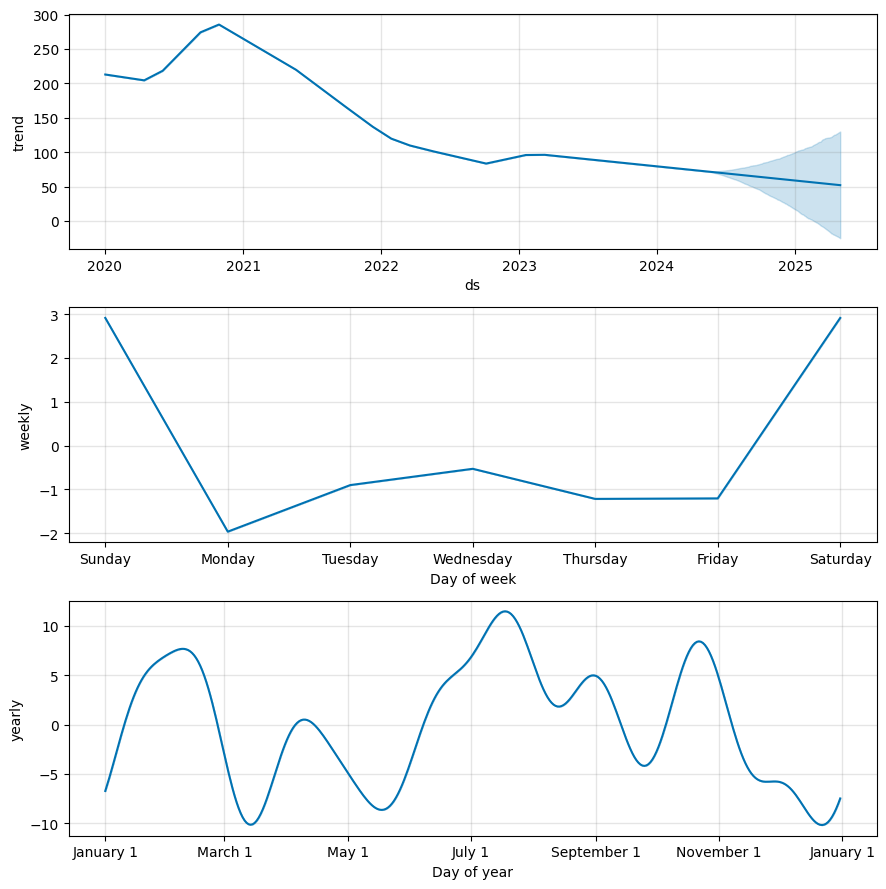

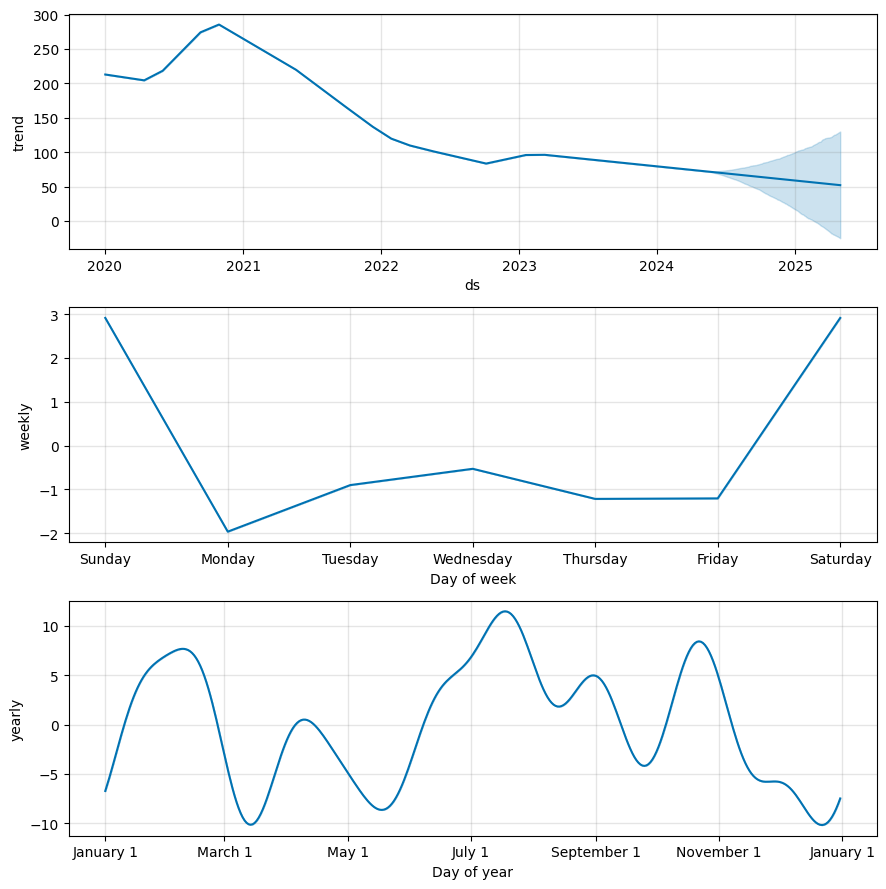

In [21]:
model.plot_components(forecast)